In [6]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

In [4]:
# import datasets

digits = datasets.load_digits()

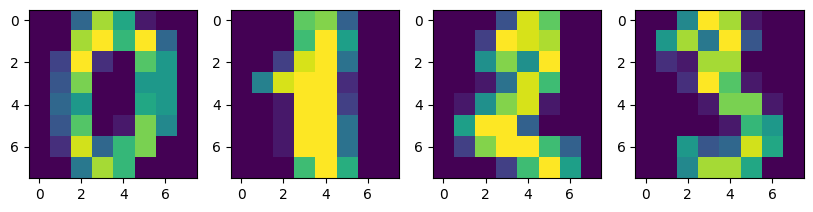

In [18]:
# create a plot with four subplots
# save second return value as 'axes' and ignore the first

# basic plot
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes,digits.images, digits.target):
    ax.imshow(image)

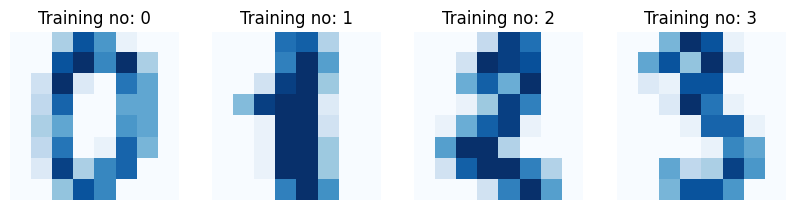

In [25]:
# make changes to the appearance of the plot

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes,digits.images, digits.target):
    ax.set_axis_off() # do not show axes and ticks
    ax.imshow(image, interpolation="nearest", cmap=plt.cm.Blues) # not sure about interpolation yet (no change observed here)
    ax.set_title("Training no: %i" % label)
    